In [23]:


# manual_oclmfit_visual_tests.py
# Amaç: pytest kullanmadan, her OCLMFit fonksiyonunu AYRI blokta denemek
# ve mümkün olduğunca görselleştirmek.
# Not: inline comments are in English.

import numpy as np
import matplotlib.pyplot as plt
from ocpy.oc_lmfit import OCLMFit

# --- importlar ---
# Eğer paket yapın "ocpy." şeklindeyse:
# from ocpy.oc_lmfit import OCLMFit
# from ocpy.oc import Linear, Quadratic, Sinusoidal, Keplerian, Parameter
#

# ---------------------------------------------------------------------
# Ortak yardımcı: veri+model çizdir
def plot_data_and_model(x, y, y_model, title=""):
    plt.figure(figsize=(8, 4))
    plt.scatter(x, y, s=20, label="data", alpha=0.7)
    plt.plot(x, y_model, label="model", linewidth=2)
    plt.title(title)
    plt.xlabel("cycle")
    plt.ylabel("O-C")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

def plot_residuals(x, resid, title="residuals"):
    plt.figure(figsize=(8, 2.8))
    plt.scatter(x, resid, s=20, label="resid", alpha=0.7)
    plt.axhline(0.0, color="k", linewidth=1)
    plt.title(title)
    plt.xlabel("cycle")
    plt.ylabel("resid")
    plt.grid(True)
    plt.tight_layout()

=== LINEAR TEST ===
[[Model]]
    Model(model_func, prefix='linear_')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 60
    # variables        = 2
    chi-square         = 5.3199e-07
    reduced chi-square = 9.1723e-09
    Akaike info crit   = -1108.45882
    Bayesian info crit = -1104.27014
    R-squared          = 0.99999835
[[Variables]]
    linear_a:  0.00250006 +/- 4.2123e-07 (0.02%) (init = 0)
    linear_b: -0.01000773 +/- 2.4422e-05 (0.24%) (init = 0)
[[Correlations]] (unreported correlations are < 0.500)
    C(linear_a, linear_b) = -0.8624


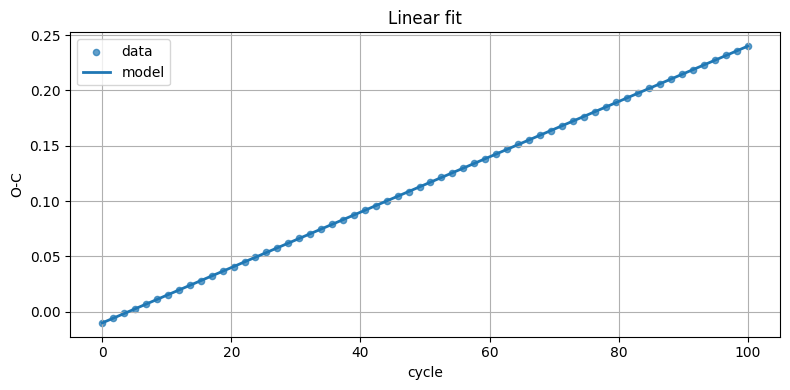

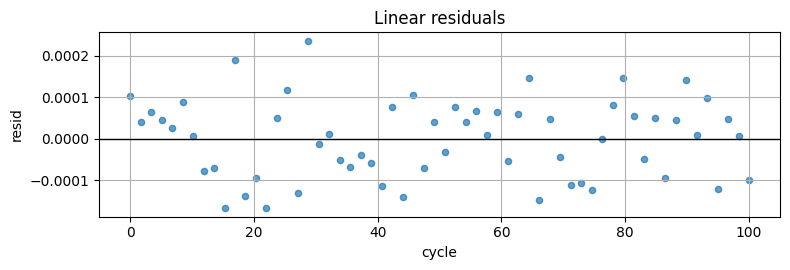

In [24]:
# ---------------------------------------------------------------------
# 1) LINEAR TEST
print("=== LINEAR TEST ===")
# synthetic linear data
x_lin = np.linspace(0, 100, 60)
true_a, true_b = 0.0025, -0.01
y_lin_true = true_a * x_lin + true_b
noise = np.random.normal(0.0, 1e-4, size=x_lin.size)
y_lin_obs = y_lin_true + noise

lin_obj = OCLMFit(
    oc=y_lin_obs.tolist(),
    cycle=x_lin.tolist(),
    weights=np.ones_like(x_lin).tolist(),
    minimum_time=[np.nan] * x_lin.size,
)

lin_res = lin_obj.fit_linear()
print(lin_res.fit_report(min_correl=0.5))

# model curve from fit
fit_a = lin_res.params["linear_a"].value
fit_b = lin_res.params["linear_b"].value
y_lin_fit = fit_a * x_lin + fit_b

plot_data_and_model(x_lin, y_lin_obs, y_lin_fit, title="Linear fit")

# residuals
lin_resid_oc = lin_obj.residue(lin_res)  # OC objesi döndürüyor
plot_residuals(
    lin_resid_oc.data["cycle"].to_numpy(),
    lin_resid_oc.data["oc"].to_numpy(),
    title="Linear residuals",
)

=== 2) fit_quadratic TEST ===
[[Model]]
    Model(model_func, prefix='quadratic_')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 5
    # data points      = 80
    # variables        = 1
    chi-square         = 1.6938e-06
    reduced chi-square = 2.1440e-08
    Akaike info crit   = -1411.64555
    Bayesian info crit = -1409.26353
    R-squared          = 0.99998882
[[Variables]]
    quadratic_q:  1.0000e-05 +/- 2.5183e-09 (0.03%) (init = 0)


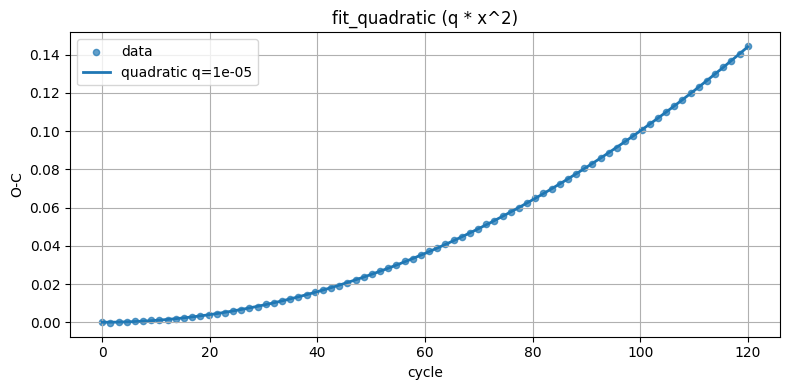

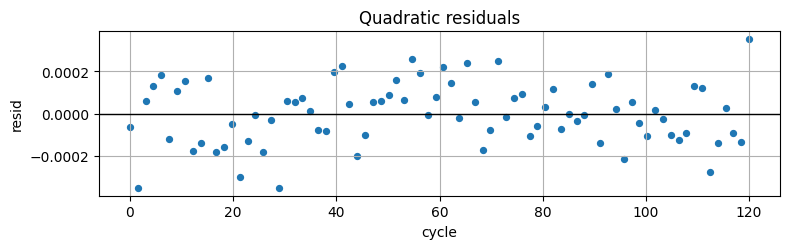

In [25]:
# ---------------------------------------------------------------------
# 2) fit_quadratic TEST
# Senin Quadratic sadece q*x^2. a,b yok. :contentReference[oaicite:6]{index=6}
print("=== 2) fit_quadratic TEST ===")
x2 = np.linspace(0, 120, 80)
y2_true = 1e-5 * x2**2
y2 = y2_true + np.random.normal(0.0, 1.5e-4, size=x2.size)

lm2 = OCLMFit(
    oc=y2.tolist(),
    cycle=x2.tolist(),
    weights=np.ones_like(x2).tolist(),
    minimum_time=[np.nan] * x2.size,
)
res2 = lm2.fit_quadratic()
print(res2.fit_report(min_correl=0.5))

# Burada model eğrisini elle çizelim (sadece q var)
q_hat = res2.params["quadratic_q"].value  # doğru isim bu
x_dense = np.linspace(x2.min(), x2.max(), 400)
y2_fit = q_hat * x_dense**2

plt.figure(figsize=(8, 4))
plt.scatter(x2, y2, s=20, label="data", alpha=0.7)
plt.plot(x_dense, y2_fit, label=f"quadratic q={q_hat:.3g}", lw=2)
plt.title("fit_quadratic (q * x^2)")
plt.xlabel("cycle")
plt.ylabel("O-C")
plt.grid(True)
plt.legend()
plt.tight_layout()

# Residual'ü de lm2'nin kendi residue'su ile
resid2 = lm2.residue(res2)
plt.figure(figsize=(8, 2.6))
plt.scatter(resid2.data["cycle"], resid2.data["oc"], s=18)
plt.axhline(0.0, color="k", lw=1)
plt.title("Quadratic residuals")
plt.xlabel("cycle")
plt.ylabel("resid")
plt.grid(True)
plt.tight_layout()

=== 3) fit_sinusoidal TEST ===
[[Model]]
    Model(model_func, prefix='sinusoidal_')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 24
    # data points      = 150
    # variables        = 2
    chi-square         = 1.7038e-04
    reduced chi-square = 1.1512e-06
    Akaike info crit   = -2049.21935
    Bayesian info crit = -2043.19808
    R-squared          = -9.9520e-05
[[Variables]]
    sinusoidal_amp:  1.2452e-11 +/- 0.01692588 (135933422659.23%) (init = 0.001)
    sinusoidal_P:    5256.48344 +/- 6.6765e+12 (127015247833.62%) (init = 3000)
[[Correlations]] (unreported correlations are < 0.500)
    C(sinusoidal_amp, sinusoidal_P) = +0.9998


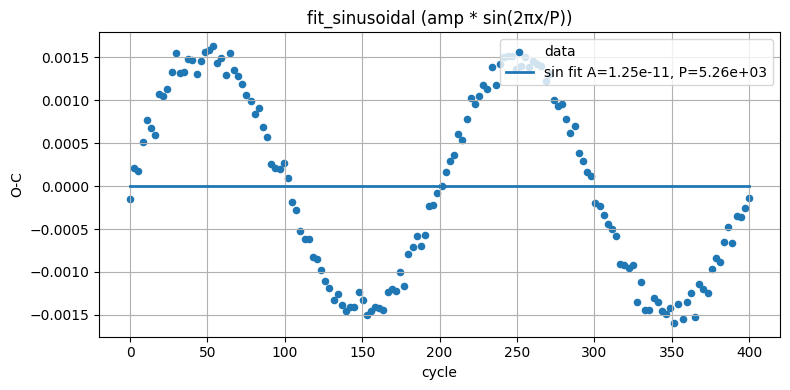

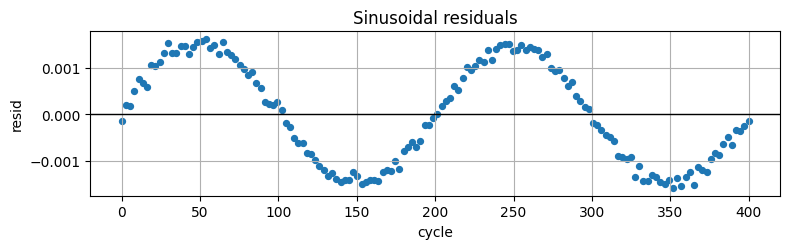

In [26]:
# ---------------------------------------------------------------------
# 3) fit_sinusoidal TEST
# Senin Sinusoidal sadece amp ve P alıyor, phase yok, offset yok. :contentReference[oaicite:7]{index=7} :contentReference[oaicite:8]{index=8}
print("=== 3) fit_sinusoidal TEST ===")
x3 = np.linspace(0, 400, 150)
true_amp = 0.0015
true_P = 200.0
y3_true = true_amp * np.sin(2.0 * np.pi * x3 / true_P)
y3 = y3_true + np.random.normal(0.0, 1e-4, size=x3.size)

lm3 = OCLMFit(
    oc=y3.tolist(),
    cycle=x3.tolist(),
    weights=np.ones_like(x3).tolist(),
    minimum_time=[np.nan] * x3.size,
)
res3 = lm3.fit_sinusoidal()
print(res3.fit_report(min_correl=0.5))

# fit edilen değerler
A_hat = res3.params["sinusoidal_amp"].value
P_hat = res3.params["sinusoidal_P"].value
x_dense = np.linspace(x3.min(), x3.max(), 500)
y3_fit = A_hat * np.sin(2.0 * np.pi * x_dense / P_hat)

plt.figure(figsize=(8, 4))
plt.scatter(x3, y3, s=20, label="data")
plt.plot(x_dense, y3_fit, lw=2, label=f"sin fit A={A_hat:.3g}, P={P_hat:.3g}")
plt.title("fit_sinusoidal (amp * sin(2πx/P))")
plt.xlabel("cycle")
plt.ylabel("O-C")
plt.grid(True)
plt.legend()
plt.tight_layout()

# residual plot
resid3 = lm3.residue(res3)
plt.figure(figsize=(8, 2.6))
plt.scatter(resid3.data["cycle"], resid3.data["oc"], s=18)
plt.axhline(0.0, color="k", lw=1)
plt.title("Sinusoidal residuals")
plt.xlabel("cycle")
plt.ylabel("resid")
plt.grid(True)
plt.tight_layout()


=== 4) fit_lite TEST ===
[[Model]]
    Model(model_func, prefix='keplerian_')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 51
    # data points      = 200
    # variables        = 5
    chi-square         = 6.0320e-05
    reduced chi-square = 3.0933e-07
    Akaike info crit   = -2992.83213
    Bayesian info crit = -2976.34054
    R-squared          = 0.07579978
[[Variables]]
    keplerian_amp:    1.9533e-04 +/- 5.5951e-05 (28.64%) (init = 0.001)
    keplerian_e:      0.71448439 +/- 0.34536132 (48.34%) (init = 0)
    keplerian_omega: -25671.5393 +/- 58.2972642 (0.23%) (init = 90)
    keplerian_P:      2537.36269 +/- 203.128057 (8.01%) (init = 3000)
    keplerian_T0:    -177847.661 +/- 14531.7285 (8.17%) (init = 0)
[[Correlations]] (unreported correlations are < 0.500)
    C(keplerian_P, keplerian_T0) = -0.9998


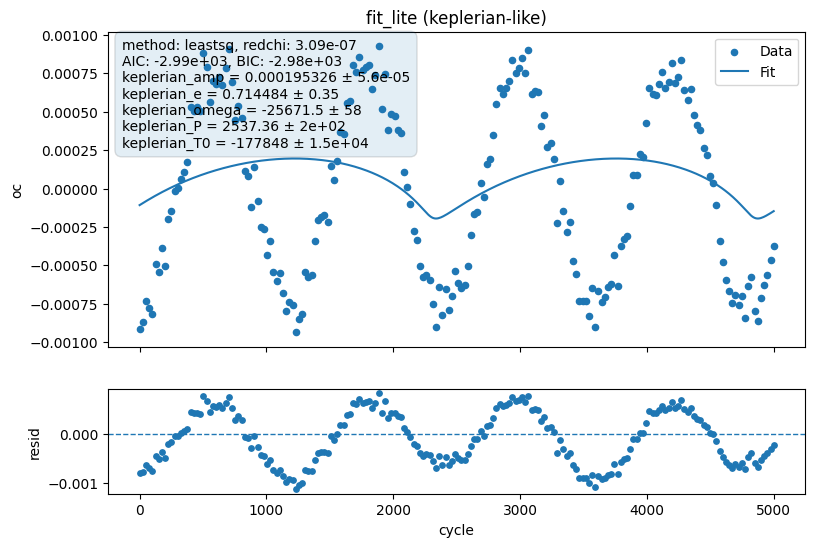

In [27]:
# ---------------------------------------------------------------------
# 4) fit_lite TEST
# oc_lmfit.fit_lite keplerian component kuruyor. :contentReference[oaicite:9]{index=9}
print("=== 4) fit_lite TEST ===")
x4 = np.linspace(0, 5000, 200)
y4_true = 0.0008 * np.sin(2.0 * np.pi * (x4 - 300.0) / 1200.0)
y4 = y4_true + np.random.normal(0.0, 1e-4, size=x4.size)

lm4 = OCLMFit(
    oc=y4.tolist(),
    cycle=x4.tolist(),
    weights=np.ones_like(x4).tolist(),
    minimum_time=[np.nan] * x4.size,
)
res4 = lm4.fit_lite()
print(res4.fit_report(min_correl=0.5))
# hazır çizici:
lm4.fit_and_report(res4, title="fit_lite (keplerian-like)")



=== 5) fit_keplerian TEST ===
[[Model]]
    Model(model_func, prefix='keplerian_')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 81
    # data points      = 200
    # variables        = 5
    chi-square         = 1.4533e-04
    reduced chi-square = 7.4526e-07
    Akaike info crit   = -2816.97032
    Bayesian info crit = -2800.47874
    R-squared          = -0.00512606
##  Warning: uncertainties could not be estimated:
    keplerian_amp:    at boundary
[[Variables]]
    keplerian_amp:    1.1564e-12 (init = 0.001)
    keplerian_e:      0.24454923 (init = 0)
    keplerian_omega:  24274.7042 (init = 90)
    keplerian_P:      3199.47693 (init = 3000)
    keplerian_T0:     231850.858 (init = 0)


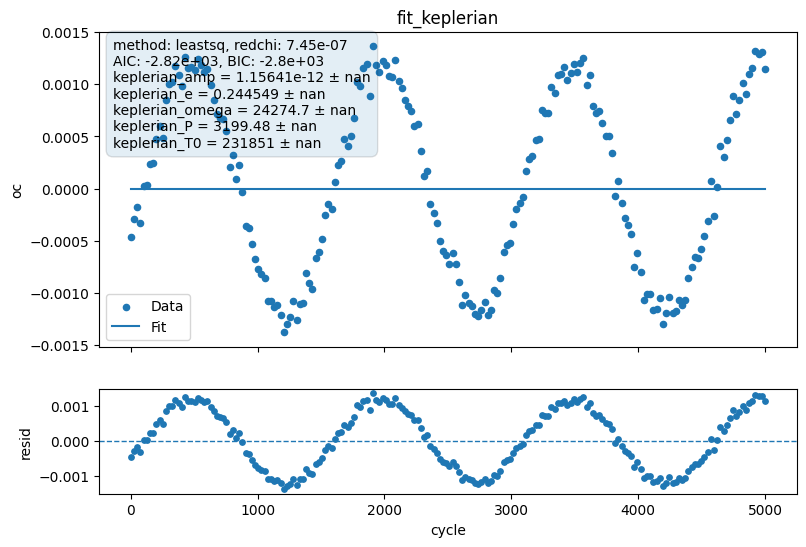

In [28]:
# ---------------------------------------------------------------------
# 5) fit_keplerian TEST
# bu zaten fit_lite'a yönlendiriyor ama yine de ayrı blok olsun. :contentReference[oaicite:10]{index=10}
print("=== 5) fit_keplerian TEST ===")
x5 = np.linspace(0, 5000, 200)
y5_true = 0.0012 * np.sin(2.0 * np.pi * (x5 - 100.0) / 1500.0)
y5 = y5_true + np.random.normal(0.0, 1e-4, size=x5.size)

lm5 = OCLMFit(
    oc=y5.tolist(),
    cycle=x5.tolist(),
    weights=np.ones_like(x5).tolist(),
    minimum_time=[np.nan] * x5.size,
)
res5 = lm5.fit_keplerian()
print(res5.fit_report(min_correl=0.5))
lm5.fit_and_report(res5, title="fit_keplerian")

=== düz fit: Linear + Sinusoidal ===
[[Model]]
    (Model(model_func, prefix='linear_') + Model(model_func, prefix='sinusoidal_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 61
    # data points      = 150
    # variables        = 4
    chi-square         = 6.9604e-05
    reduced chi-square = 4.7674e-07
    Akaike info crit   = -2179.49798
    Bayesian info crit = -2167.45544
    R-squared          = 0.99997287
[[Variables]]
    linear_a:        0.00149997 +/- 6.5276e-07 (0.04%) (init = 0)
    linear_b:        5.0555e-04 +/- 1.1289e-04 (22.33%) (init = 0)
    sinusoidal_amp:  2.0948e-05 +/- 7.9824e-05 (381.06%) (init = 0.001)
    sinusoidal_P:    51.3570909 +/- 9.44566538 (18.39%) (init = 200)
[[Correlations]] (unreported correlations are < 0.500)
    C(linear_a, linear_b) = -0.8659


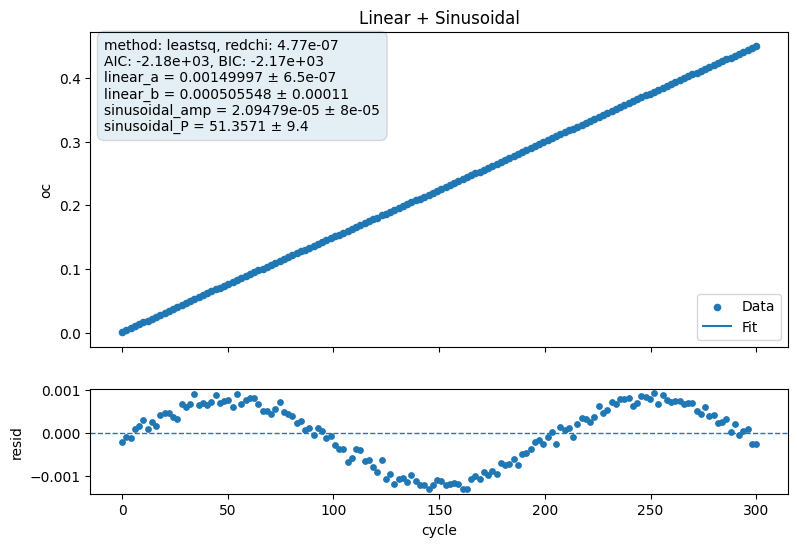

In [29]:
import numpy as np
import matplotlib.pyplot as plt

from ocpy.oc_lmfit import OCLMFit  # senin dosya :contentReference[oaicite:3]{index=3}
from ocpy.oc import Linear, Quadratic, Sinusoidal, Keplerian, Parameter  # senin dosya :contentReference[oaicite:4]{index=4}

# ------------------------------------------------------------
# 1) DÜZ FIT: Linear + Sinusoidal
print("=== düz fit: Linear + Sinusoidal ===")

x = np.linspace(0, 300, 150)
y_true = 0.0015 * x + 0.001 * np.sin(2*np.pi * x / 200.0) + 0.0003
y = y_true + np.random.normal(0.0, 1e-4, size=x.size)

oc_lm = OCLMFit(
    oc=y.tolist(),
    cycle=x.tolist(),
    weights=np.ones_like(x).tolist(),
    minimum_time=[np.nan] * x.size,
)

comp_lin = Linear(
    a=Parameter(value=0.0, fixed=False),
    b=Parameter(value=0.0, fixed=False),
)
comp_sin = Sinusoidal(
    amp=Parameter(value=1e-3, min=0),           # amp 0 olmasın
    P=Parameter(value=200.0, min=50, max=400),  # 3000 kaçışını engelle
)

res_mix = oc_lm.fit([comp_lin, comp_sin])
print(res_mix.fit_report(min_correl=0.5))
oc_lm.fit_and_report(res_mix, title="Linear + Sinusoidal")

=== düz fit: Quadratic + Sinusoidal ===
[[Model]]
    (Model(model_func, prefix='quadratic_') + Model(model_func, prefix='sinusoidal_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 57
    # data points      = 160
    # variables        = 3
    chi-square         = 1.1370e-04
    reduced chi-square = 7.2423e-07
    Akaike info crit   = -2259.13397
    Bayesian info crit = -2249.90845
    R-squared          = 0.99999473
##  Warning: uncertainties could not be estimated:
    sinusoidal_amp:  at boundary
[[Variables]]
    quadratic_q:     9.9961e-06 (init = 0)
    sinusoidal_amp:  4.0612e-13 (init = 0.001)
    sinusoidal_P:    332.078597 (init = 180)


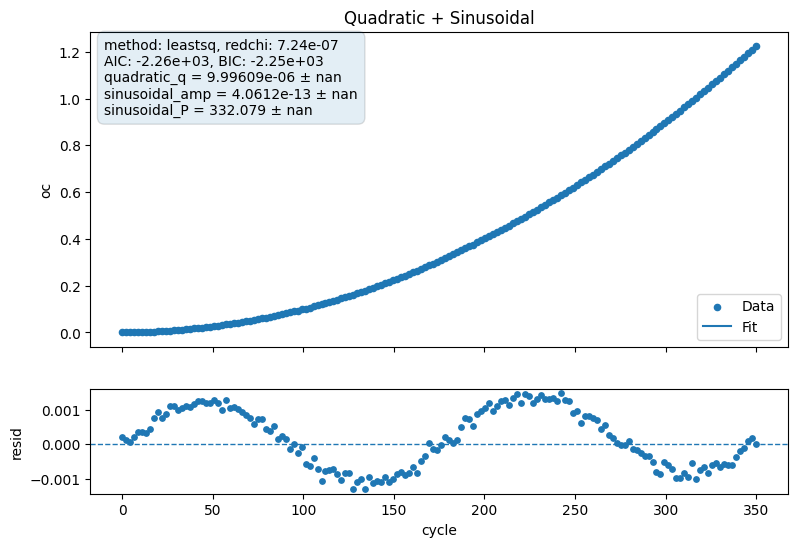

=== düz fit: Linear + Keplerian ===
[[Model]]
    (Model(model_func, prefix='linear_') + Model(model_func, prefix='keplerian_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 111
    # data points      = 220
    # variables        = 7
    chi-square         = 2.0239e-06
    reduced chi-square = 9.5020e-09
    Akaike info crit   = -4056.90142
    Bayesian info crit = -4033.14603
    R-squared          = 0.99999825
[[Variables]]
    linear_a:         5.0001e-05 +/- 4.6146e-09 (0.01%) (init = 0)
    linear_b:         1.1451e-05 +/- 1.6312e-05 (142.45%) (init = 0)
    keplerian_amp:    7.8593e-04 +/- 1.4988e-05 (1.91%) (init = 0.001)
    keplerian_e:      0.04095488 +/- 0.02209981 (53.96%) (init = 0)
    keplerian_omega:  52304.5395 +/- 33.2349787 (0.06%) (init = 90)
    keplerian_P:      1200.13902 +/- 1.97176825 (0.16%) (init = 1200)
    keplerian_T0:     173467.288 +/- 306.155568 (0.18%) (init = 300)
[[Correlations]] (unreported correlations are < 0.500)
 

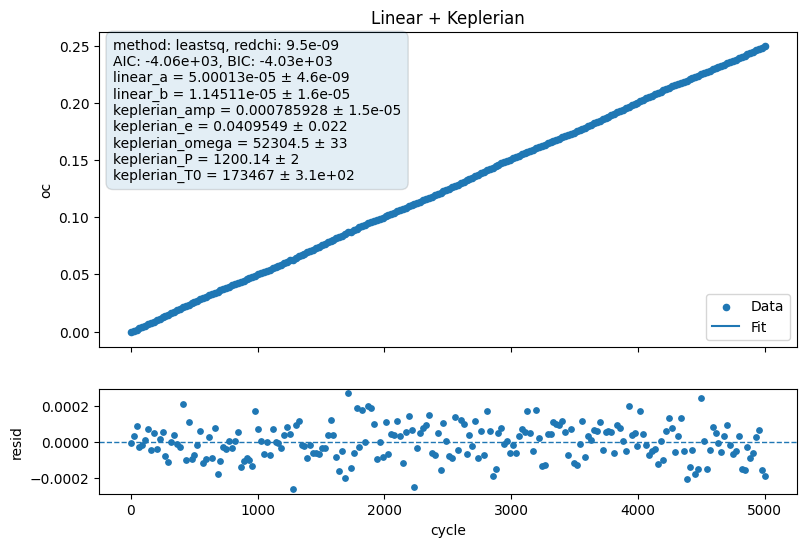

bitti.


In [31]:
# ------------------------------------------------------------
# 2) DÜZ FIT: Quadratic + Sinusoidal
print("=== düz fit: Quadratic + Sinusoidal ===")

x2 = np.linspace(0, 350, 160)
y2_true = 1e-5 * x2**2 + 0.0012 * np.sin(2*np.pi * x2 / 180.0)
y2 = y2_true + np.random.normal(0.0, 1.3e-4, size=x2.size)

oc_lm2 = OCLMFit(
    oc=y2.tolist(),
    cycle=x2.tolist(),
    weights=np.ones_like(x2).tolist(),
    minimum_time=[np.nan] * x2.size,
)

comp_quad = Quadratic(
    q=Parameter(value=0.0, fixed=False),
)
comp_sin2 = Sinusoidal(
    amp=Parameter(value=1e-3, min=0),
    P=Parameter(value=180.0, min=50, max=400),
)

res_qs = oc_lm2.fit([comp_quad, comp_sin2])
print(res_qs.fit_report(min_correl=0.5))
oc_lm2.fit_and_report(res_qs, title="Quadratic + Sinusoidal")

# ------------------------------------------------------------
# 3) DÜZ FIT: Linear + Keplerian
print("=== düz fit: Linear + Keplerian ===")

x3 = np.linspace(0, 5000, 220)
# lineer küçük eğim + uzun dönem kepler benzeri sinüs
y3_true = 0.00005 * x3 + 0.0008 * np.sin(2*np.pi * (x3 - 300.0) / 1200.0)
y3 = y3_true + np.random.normal(0.0, 1e-4, size=x3.size)

oc_lm3 = OCLMFit(
    oc=y3.tolist(),
    cycle=x3.tolist(),
    weights=np.ones_like(x3).tolist(),
    minimum_time=[np.nan] * x3.size,
)

comp_lin3 = Linear(
    a=Parameter(value=0.0, fixed=False),
    b=Parameter(value=0.0, fixed=False),
)
comp_kep = Keplerian(
    amp=Parameter(value=1e-3, min=0),
    e=Parameter(value=0.0, min=0.0, max=0.9),
    omega=Parameter(value=90.0),
    P=Parameter(value=1200.0, min=200.0, max=5000.0),  # default 3000 ama biz sinyali biliyoruz
    T0=Parameter(value=300.0),
)

res_lk = oc_lm3.fit([comp_lin3, comp_kep])
print(res_lk.fit_report(min_correl=0.5))
oc_lm3.fit_and_report(res_lk, title="Linear + Keplerian")

print("bitti.")